# Genetic Programming

## Introduction using GPLearn

[GPLearn](https://github.com/trevorstephens/gplearn) is a GP framework that uses an API similar to scikit-learn. In this example we will try to solve a symbolic regression problem, in two dimensions (i.e., with two input variables). 

In [1]:
%pip install gplearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


First of all, we import the necessary library, including the ones used for plotting

In [2]:
import gplearn.genetic as gp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import sklearn.utils as skutil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Here we define the target function as $f(x,y) = \sin(3x) + \sin(3y)$. You can change it in any way you want

In [3]:
def target(x, y):
    # here we have the target function we wont to replicate or at least come close
    return np.sin(3*x) + np.sin(3*y)

The function that we want to learn is then evaluated in $10^5$ equally sapaced points in $[-1,1] \times [-1,1]$

In [4]:
x_coords = np.linspace(-1, 1, 100) # 100 points from -1 to 1
y_coords = np.linspace(-1, 1, 100) # 100 points fron -1 to 1
x_coords, y_coords = np.meshgrid(x_coords,y_coords) # we build a grid X points * y points
target_points = target(x_coords,y_coords) # set the target point we want to reach

Here we display the target function

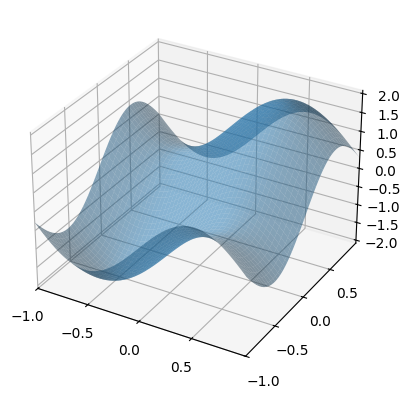

In [5]:
plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xticks(np.arange(-1,1,.5))
ax.set_yticks(np.arange(-1,1,.5))
ax.plot_surface(x_coords, y_coords, target_points, alpha=0.5)
plt.show()

For the learning process we select $100$ random points in $[-1,1]\times[-1,1]$. That is, GP does not have direct access to the function but only to a subset of points sampled from it.

In [6]:
rng = skutil.check_random_state(0) 

# we have to reshape the training point for allow the GP to eat them with out trouble
x_train = rng.uniform(-1, 1, 100).reshape(50, 2) 
y_train = target(x_train[:, 0], x_train[:, 1])

Here we perform the actual GP run. Usually we can directly set the parameter `generations` to the maximum number of generations. Here, however, we stop after every generation to collect the best individual at that generation.

The set of functional sysmbols contains, in addition to the usual $+$, $\times$, $-$ and $\div$, also the functions $\sin$, $\cos$, $\sqrt{\cdot}$. Try to change them to see how the solutions found change.

In [7]:
fset=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt') # removing sin and cos will make impossible reproducing the target function
predicted_data = []
max_gen = 50 # increse for more generation. Remeber to set the same value in the print below for allow the visualization bar to move further
sr = gp.SymbolicRegressor(population_size=500,
                          generations=1,
                          function_set=fset,
                          stopping_criteria=0.01, # the error after wich it stop
                          p_crossover=0.8, # Probability of performing subtree crossover
                          p_subtree_mutation=0.1, # Probability of subtree mutation
                          p_hoist_mutation=0.05, # Small probability of hoist mutation
                          p_point_mutation=0.05, # Small probability of point mutation
                          parsimony_coefficient=0.01, # Penalization of large trees
                          verbose=0, # Set to 1 to obtain the fitness values
                          random_state=0,
                          warm_start=True)
for i in range(0, max_gen+1): # we perform all the generation we have set before
    sr.set_params(generations=i+1) # set the parameters
    sr.fit(x_train, y_train) # fit the population
    predicted_data.append(sr.predict(np.c_[x_coords.ravel(),y_coords.ravel()]).reshape(x_coords.shape)) # and predict the andament

FInally, we display the functions found by the GP process. It is possible to check how the solution changes with time.

In [8]:
def print_results(i):
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xticks(np.arange(-1,1,.5))
    ax.set_yticks(np.arange(-1,1,.5))
    ax.plot_surface(x_coords, y_coords, predicted_data[i], alpha=0.5, color='red')
    ax.plot_surface(x_coords, y_coords, target_points, alpha=0.1)

interact(print_results, i=widgets.IntSlider(min=0,max=50,step=5,value=0)) # change the max value if you have changed the number of generation
plt.show()

interactive(children=(IntSlider(value=0, description='i', max=50, step=5), Output()), _dom_classes=('widget-in…

As it is possible to observe, after about $30$ generations, GP was able to find the optimal solution.

The resulting program is:

In [9]:
print(sr._program)

add(sin(add(X0, add(X0, X0))), sin(add(X1, add(X1, X1))))
